In [21]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import os
from measures.utils import get_partitions
import seaborn as sns
import numpy as np

In [19]:
gf = nx.read_gml('following.gml', label='id')
degree_sequence = sorted([[n, d] for n, d in gf.degree()], reverse=True)
degrees = sorted([d for n, d in gf.degree()], reverse=True)

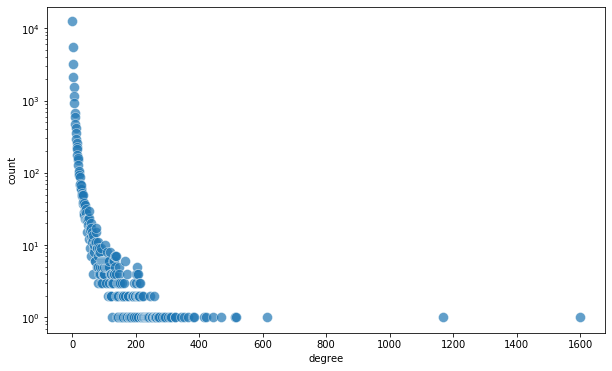

In [84]:
unique, counts = np.unique(degrees, return_counts=True)

gfdf = pd.DataFrame(np.asarray((unique, counts)).T, columns=['degree', 'count'])
f, ax = plt.subplots(figsize=(10, 6))
g = sns.scatterplot(x="degree", y="count", data=gfdf, ax=ax, alpha=0.7, linewidth=0.5, s=100)
ax.set_yscale("log")
#ax.set_xscale("log")
plt.show()

In [93]:
gfdf.describe()

,degree,count
count,242.00000,242.000000
mean,150.46281,136.892562
std,155.17847,911.633182
min,1.00000,1.000000
25%,61.25000,1.000000
50%,122.50000,4.000000
75%,202.75000,13.750000
max,1598.00000,12411.000000


In [89]:
gi = nx.read_gml('ignoring.gml', label='id')
gi_degrees = sorted([d for n, d in gi.degree()], reverse=True)
gidf = pd.DataFrame(np.asarray((np.unique(gi_degrees, return_counts=True))).T, columns=['degree', 'count'])

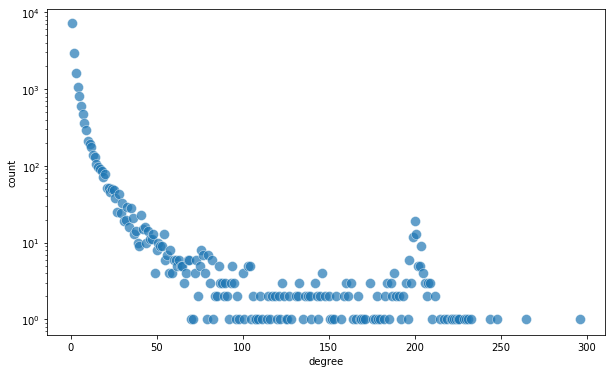

In [90]:
f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="degree", y="count", data=gidf, ax=ax, alpha=0.7, linewidth=0.5, s=100)
ax.set_yscale("log")
#ax.set_xscale("log")
plt.show()

In [91]:
gidf.describe()



,degree,count
count,205.000000,205.000000
mean,111.917073,87.195122
std,70.096768,559.499637
min,1.000000,1.000000
25%,52.000000,1.000000
50%,105.000000,3.000000
75%,171.000000,10.000000
max,296.000000,7160.000000


In [92]:
len(list(gi.nodes()))



17875

In [116]:
gfi = nx.read_gml('follow_ignore.gml', label='id')
gfi_degrees = [[n, d] for n, d in gfi.in_degree(weight='weight')]
gfidf = pd.DataFrame(data=gfi_degrees, columns=['node', 'in_degree_weighted'])
gfi_degrees = [d for n, d in gfi.in_degree()]
gfidf['in_degree'] = gfi_degrees
gfi_degrees = [d for n, d in gfi.out_degree(weight='weight')]
gfidf['out_degree_weighted'] = gfi_degrees
gfi_degrees = [d for n, d in gfi.out_degree()]
gfidf['out_degree'] = gfi_degrees

In [117]:
gfidf.head()



,node,in_degree_weighted,in_degree,out_degree_weighted,out_degree
0,0,1,1,1,1
1,1,-3,17,2,4
2,2,-1,17,-10,16
3,3,38,110,-105,109
4,4,19,31,-8,12


In [118]:
gfidf.sort_values(by='in_degree_weighted')

,node,in_degree_weighted,in_degree,out_degree_weighted,out_degree
586,586,-238,258,0,0
1207,1207,-218,240,1,5
2384,2384,-205,247,1,1
2410,2410,-189,229,1,1
711,711,-173,277,4,4
595,595,-170,288,9,9
309,309,-163,165,0,0
1220,1220,-146,148,5,7
1225,1225,-137,151,2,2
104,104,-133,133,0,0


In [119]:
gfidf.corr()



,node,in_degree_weighted,in_degree,out_degree_weighted,out_degree
node,1.000000,-0.097082,-0.298255,-0.062667,-0.160450
in_degree_weighted,-0.097082,1.000000,0.691912,0.169640,0.209884
in_degree,-0.298255,0.691912,1.000000,0.155979,0.258624
out_degree_weighted,-0.062667,0.169640,0.155979,1.000000,-0.165650
out_degree,-0.160450,0.209884,0.258624,-0.165650,1.000000


In [121]:
gfidf.describe()




,node,in_degree_weighted,in_degree,out_degree_weighted,out_degree
count,38949.000000,38949.000000,38949.000000,38949.000000,38949.000000
mean,19474.000000,1.450307,4.971424,1.450307,4.971424
std,11243.752154,14.875108,17.369302,16.964987,19.011257
min,0.000000,-238.000000,0.000000,-200.000000,0.000000
25%,9737.000000,0.000000,0.000000,0.000000,0.000000
50%,19474.000000,0.000000,1.000000,1.000000,1.000000
75%,29211.000000,1.000000,4.000000,2.000000,3.000000
max,38948.000000,1559.000000,1609.000000,200.000000,399.000000
